# Project: Yelp Dataset
# Author: Akhilesh Somani
# University of Illinois at Urbana-Champaign

# Import basic packages

In [1]:
import json, tqdm, time, copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_palette('colorblind')
sns.set_context('talk')

In [2]:
%load_ext autoreload
%autoreload 2

# Data Preprocessing:

In [3]:
# Refer to the module csv_generation.py for dataframes processing
from csv_generation import all_dataframes

Time to read business csv into a dataframe (in secs): 2.4235217571258545
Time to read review csv into a dataframe (in secs): 124.36356711387634


D:\Anaconda3\envs\CS412-project\lib\site-packages\IPython\core\interactiveshell.py:3417: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Time to read user csv into a dataframe (in secs): 51.166229009628296
All files read and dataframes created!


# Create 'named' dataframes (for convenience):

In [4]:
business_df, review_df, user_df = all_dataframes['business'], all_dataframes['review'], all_dataframes['user']

In [5]:
business_df.rename(columns = {'stars':'stars_business_avg'}, inplace = True)

In [6]:
business_df.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_business_avg,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",NaN
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN


In [7]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [8]:
user_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,NaN,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,...,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,...,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,...,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,...,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,...,9,2,1,1,22,28,31,31,19,31


# Data Exploration:

## (1) Number of data points:

In [9]:
len(business_df), len(review_df), len(user_df)

(209393, 8021122, 1968703)

## (2) Missing Values:

In [10]:
try:
    import missingno as msno
except: 
    import sys
    !{sys.executable} -m pip install missingno
    import missingno as msno

<AxesSubplot:>

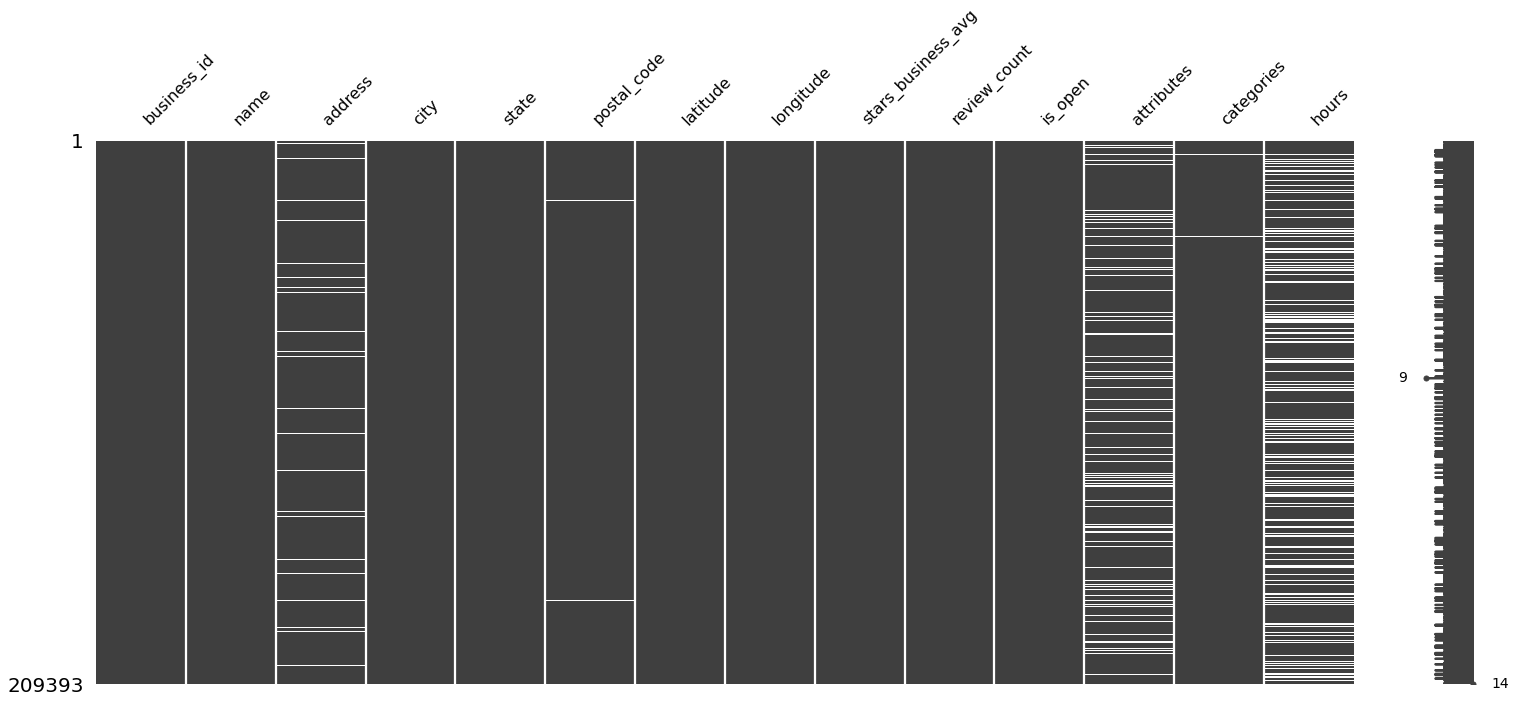

In [11]:
msno.matrix(business_df)

In [12]:
len(business_df.city.unique())

1251

In [13]:
sum(business_df.city.isna())

2

In [14]:
business_df.fillna('Null Value', inplace = True)

In [15]:
business_df.groupby('city')['name'].count()

city
110 Las Vegas         1
4321 W Flamingo Rd    1
ARSENAL               1
AZ                    1
Agincourt             2
                     ..
toronto               3
Ãle-Perrot           1
Ãle-des-Soeurs       1
âAvondale           1
âGilbert            1
Name: name, Length: 1251, dtype: int64

## Convert all string in the 'city' column to lower case for ease of handling and avoiding data inconsistency

In [16]:
business_df.city = business_df.city.str.lower()

In [17]:
business_df[business_df.city.str.contains('toronto')].city.unique()

array(['toronto', 'north toronto', 'toronto - front st (ot)',
       'toronto-etobicoke', 'toronto division', 'west toronto',
       'toronto-north york', 'toronto-west', 'downtown toronto',
       'toronto - danforth (ot)'], dtype=object)

In [18]:
len(business_df[business_df.city.str.contains('champaign|urbana')])

1753

In [19]:
len(business_df[business_df.city.str.contains('phoenix')])

20205

## Choose Phoenix, Toronto, and Champaign for further analysis to reduce the dataset we are dealing with:

In [20]:
yelp_business_df = business_df[business_df.city.str.contains('toronto|phoenix|urbana|champaign')].copy()
len(yelp_business_df)

42340

In [21]:
yelp_business_df.city.unique()

array(['champaign', 'toronto', 'phoenix', 'urbana', 'urbana, illinois',
       'north toronto', 'toronto - front st (ot)', 'phoenix ap',
       'toronto-etobicoke', 'phoenix ', 'toronto division',
       'metro phoenix', 'phoenix, az', 'west toronto',
       'toronto-north york', 'toronto-west', 'phoenix metro area',
       'downtown toronto', 'north phoenix', 'phoenix valley',
       'toronto - danforth (ot)', 'phoenix,', 'phoenix az'], dtype=object)

## Data consistency for 'city':

In [22]:
yelp_business_df.city.replace(r'^.*toronto.*$', 'toronto', regex = True, inplace = True)
yelp_business_df.city.replace(r'^.*phoenix.*$', 'phoenix', regex=True, inplace = True)
yelp_business_df.city.replace(r'^.*champaign.*$', 'urbana-champaign', regex = True, inplace = True)
yelp_business_df.city.replace(r'^.*urbana.*$', 'urbana-champaign', regex=True, inplace = True)
yelp_business_df.city.unique()

array(['urbana-champaign', 'toronto', 'phoenix'], dtype=object)

In [23]:
yelp_business_df.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_business_avg,review_count,is_open,attributes,categories,hours
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,urbana-champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
9,EosRKXIGeSWFYWwpkbhNnA,Xtreme Couture,700 Kipling Avenue Etobicoke,toronto,ON,M8Z 5G3,43.624539,-79.529108,3.0,16,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Martial Arts, Gyms, Fitness & Instruction, Act...","{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'..."
26,1wWneWD_E1pBIyVpdHMaQg,Air Jordan Store,306 Yonge Street,toronto,ON,M5B 1R4,43.656542,-79.381308,4.0,9,1,"{'RestaurantsPriceRange2': '3', 'BikeParking':...","Shopping, Shoe Stores, Fashion","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."


# Sort the restaurants by stars_business_avg:

In [24]:
yelp_restaurants_df = yelp_business_df[yelp_business_df.categories.str.contains('restaurants', case = False)]
yelp_restaurants_df.to_csv('my_cities_restaurants.csv')

### (1) Toronto:

In [25]:
toronto_restaurants_sorted = yelp_restaurants_df.query('city == "toronto"').sort_values(['stars_business_avg', 'review_count'], ascending=False)
toronto_restaurants_sorted.head(4)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_business_avg,review_count,is_open,attributes,categories,hours
39603,g6AFW-zY0wDvBl9U82g4zg,Baretto Caffe,1262 Don Mills Road,toronto,ON,M3B 2W7,43.744703,-79.346468,5.0,317,1,"{'BikeParking': 'True', 'Alcohol': ""u'none'"", ...","Restaurants, Italian, Cafes","{'Monday': '7:30-18:0', 'Tuesday': '7:30-18:0'..."
148903,J9vAdD2dCpFuGsxPIn184w,New Orleans Seafood & Steakhouse,267 Scarlett Road,toronto,ON,M6N 4L1,43.677744,-79.506248,5.0,122,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Steakhouses, Cajun/Creole, Restaurants, Seafood","{'Tuesday': '17:0-21:15', 'Wednesday': '17:0-2..."
23075,JB8-8TtNYX-vLqN7cz-zHA,Zeal Burgers,1926 Weston Road,toronto,ON,M9N 1W2,43.700356,-79.517524,5.0,103,1,"{'RestaurantsAttire': ""'casual'"", 'OutdoorSeat...","Restaurants, Burgers","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
410,VUADGMPLJoWqhHb1G4LIcA,Veghed,1199 Dundas Street W,toronto,ON,M6J 1X3,43.649166,-79.422498,5.0,71,1,"{'BusinessParking': ""{'garage': False, 'street...","Vegan, Restaurants, Vegetarian","{'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'..."


In [26]:
len(toronto_restaurants_sorted[toronto_restaurants_sorted.review_count >= 100].query('stars_business_avg == 5.0'))

3

### There are just 3 restaurants in Toronto with a 5 star rating and over a 100 reviews on Yelp

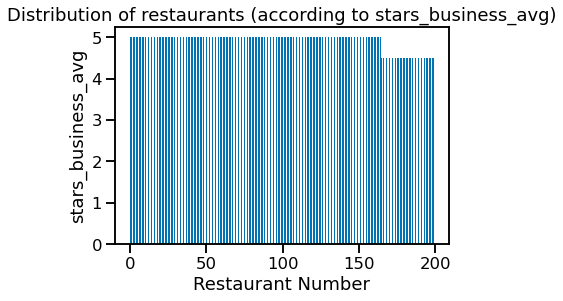

In [27]:
plt.bar(range(200), toronto_restaurants_sorted.stars_business_avg[:200], width = 0.5)
plt.ylabel('stars_business_avg')
plt.xlabel('Restaurant Number')
plt.title('Distribution of restaurants (according to stars_business_avg)')
plt.show()

### (2) Phoenix:

In [28]:
phoenix_restaurants_sorted = yelp_restaurants_df.query('city == "phoenix"').sort_values(['stars_business_avg', 'review_count'], ascending=False)
phoenix_restaurants_sorted.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_business_avg,review_count,is_open,attributes,categories,hours
141155,Xg5qEQiB-7L6kGJ5F4K3bQ,Little Miss BBQ,4301 E University Dr,phoenix,AZ,85034,33.421714,-111.989161,5.0,2329,1,"{'RestaurantsDelivery': 'False', 'RestaurantsA...","Barbeque, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ..."
159659,9MVKjEMN5T59uzG1xoD2BQ,Cocina Madrigal,4044 S 16th St,phoenix,AZ,85040,33.408767,-112.047381,5.0,1107,1,"{'GoodForKids': 'True', 'WiFi': ""u'free'"", 'Re...","Restaurants, Mexican","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
24209,mss-LiOfL1vtoNo3WoEoJw,Kiss Pollos Estilo Sinaloa,306 W Yavapai St,phoenix,AZ,85003,33.436169,-112.077588,5.0,234,1,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Restaurants, Salad, American (New), Mexican, T...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-19:0', ..."


In [29]:
len(phoenix_restaurants_sorted[phoenix_restaurants_sorted.review_count >= 100].query('stars_business_avg == 5.0'))

17

### There are 17 restaurants in Phoenix with a 5 star rating and over a 100 reviews on Yelp

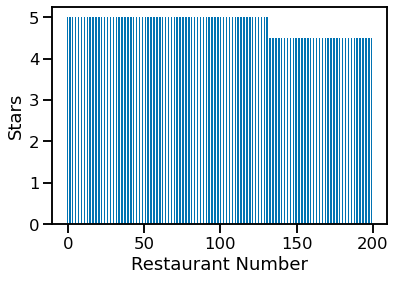

In [30]:
plt.bar(range(200), phoenix_restaurants_sorted.stars_business_avg[:200], width = 0.5)
plt.ylabel('Stars')
plt.xlabel('Restaurant Number')
plt.show()

### (3) Champaign:

In [31]:
champaign_restaurants_sorted = yelp_restaurants_df.query('city == "urbana-champaign"')\
.sort_values(['stars_business_avg', 'review_count'], ascending=False)
champaign_restaurants_sorted.head(4)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_business_avg,review_count,is_open,attributes,categories,hours
119219,4hWDMVtfnpyY72_5QMbthA,Old Time Meat & Deli Shoppe,2018 S Neil St,urbana-champaign,IL,61820,40.091901,-88.245362,5.0,46,1,"{'BusinessParking': ""{'garage': False, 'street...","Meat Shops, Food, Restaurants, Specialty Food,...","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
85355,5lw5rrhFMz-liykUn8dGSw,Fernando's Food,44 E Sprinfield,urbana-champaign,IL,61820,40.112846,-88.240511,5.0,44,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Food Delivery Services, Mexican, Food, Food Tr...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'..."
120949,A_eABcl0LTts73RNo2Np2Q,Krannert Center for the Performing Arts,500 S Goodwin Ave,urbana-champaign,IL,61801,40.108013,-88.222747,5.0,26,1,"{'BikeParking': 'True', 'GoodForKids': 'True',...","Health & Medical, Ticket Sales, Music Venues, ...","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
115216,fTcqd-yameQpFg22hNFxsQ,Bossa Nova Cafe,1 E Main St,urbana-champaign,IL,61820,40.118317,-88.243000,5.0,10,1,"{'BusinessParking': ""{'garage': False, 'street...","Restaurants, Cafes","{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ..."


# Filter out the user-item dataframe for "urbana-champaign" city

In [32]:
try:
    champaign_user_item_df = pd.read_csv('yelp_dataset/champaign_user_item.csv', index_col = 0)
except:
    champaign_user_item_df = pd.merge(champaign_restaurants_sorted, review_df, how = 'inner', on = 'business_id')
    champaign_user_item_df.to_csv('yelp_dataset/champaign_user_item.csv')

In [33]:
len(champaign_user_item_df)

30495

In [34]:
champaign_user_item_df.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_business_avg,review_count,...,categories,hours,review_id,user_id,stars,useful,funny,cool,text,date
0,4hWDMVtfnpyY72_5QMbthA,Old Time Meat & Deli Shoppe,2018 S Neil St,urbana-champaign,IL,61820.0,40.091901,-88.245362,5.0,46,...,"Meat Shops, Food, Restaurants, Specialty Food,...","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'...",WruGbPJAuXAl5GP28fH1cA,5rM50rIojxWNQRv0Vmuulg,5.0,0,0,0,This is a wonderful butchershop. Deli selectio...,2011-08-25 01:04:12
1,4hWDMVtfnpyY72_5QMbthA,Old Time Meat & Deli Shoppe,2018 S Neil St,urbana-champaign,IL,61820.0,40.091901,-88.245362,5.0,46,...,"Meat Shops, Food, Restaurants, Specialty Food,...","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'...",NozR-GCiMHWyhqRbW4TDuA,9ZuE5YJQvNA4PvldrTgmXA,5.0,1,1,1,I'm almost reluctant to give it 5 stars only s...,2016-04-12 05:07:23


# Filter out the user-item dataframe for "toronto" city

In [35]:
try:
    toronto_user_item_df = pd.read_csv('yelp_dataset/toronto_user_item.csv', index_col = 0)
except:
    toronto_user_item_df = pd.merge(toronto_restaurants_sorted, review_df, how = 'inner', on = 'business_id')
    toronto_user_item_df.to_csv('yelp_dataset/toronto_user_item.csv')

In [36]:
len(toronto_user_item_df)

432514

In [37]:
toronto_user_item_df.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_business_avg,review_count,...,categories,hours,review_id,user_id,stars,useful,funny,cool,text,date
0,g6AFW-zY0wDvBl9U82g4zg,Baretto Caffe,1262 Don Mills Road,toronto,ON,M3B 2W7,43.744703,-79.346468,5.0,317,...,"Restaurants, Italian, Cafes","{'Monday': '7:30-18:0', 'Tuesday': '7:30-18:0'...",SKBNW4QKNiclQ6mB2AQ8MQ,q3JSVBWICgXfO-zuLAp5fg,3.0,0,0,0,The customer service is on point. The food was...,2018-10-04 10:57:11
1,g6AFW-zY0wDvBl9U82g4zg,Baretto Caffe,1262 Don Mills Road,toronto,ON,M3B 2W7,43.744703,-79.346468,5.0,317,...,"Restaurants, Italian, Cafes","{'Monday': '7:30-18:0', 'Tuesday': '7:30-18:0'...",0dsaJN8eljlYRCqPWN1JCQ,0zW0RwIRwyJ6Qdirqvs5gA,5.0,0,0,0,The staff and workers are really friendly and ...,2017-04-30 13:40:40
2,g6AFW-zY0wDvBl9U82g4zg,Baretto Caffe,1262 Don Mills Road,toronto,ON,M3B 2W7,43.744703,-79.346468,5.0,317,...,"Restaurants, Italian, Cafes","{'Monday': '7:30-18:0', 'Tuesday': '7:30-18:0'...",aPUINDQsgifg_hSROs4TTA,eurxcv4blzrEs7-IgLGt5w,5.0,0,0,0,This is one great cafe. A little hard to find ...,2015-03-18 22:16:23


In [44]:
# Filter the dataset to contain only the users who have reviewed at least 10 restaurants or more
grouped = toronto_user_item_df.groupby('user_id')
toronto_user_item_filtered_df = grouped.filter(lambda x: x['name'].count() >= 10)

df = toronto_user_item_filtered_df.copy()
dataset_to_use = df.drop_duplicates(subset = ['business_id', 'user_id']).copy()
dataset_to_use.to_csv('yelp_dataset/toronto_user_item_filtered_df.csv')

In [46]:
toronto_user_item_final_df = pd.merge(dataset_to_use, user_df, how = 'inner', on = 'user_id')
toronto_user_item_final_df.to_csv('yelp_dataset/toronto_user_item_final_df.csv')

# BASELINE 1:

In [47]:
from Baseline1 import baseline1

In [48]:
# Baseline for champaign dataset
baseline1_champaign_rmse, baseline1_champaign_r2 = baseline1(champaign_user_item_df, verbose = True)

Successfully created train-test data (80:20)
Successfully created pivot table for train data
Successfully created avg rating for train data
Successfully performed SVD
Successfully completed test data predictions
Root Mean Squared Error is: 1.290005917432121
r^2 score is: 0.15770853570431698


In [49]:
# Baseline for toronto dataset
baseline1_toronto_rmse, baseline1_toronto_r2 = baseline1(toronto_user_item_df, verbose = True)

Successfully created train-test data (80:20)


MemoryError: Unable to allocate 3.48 GiB for an array with shape (89724, 5207) and data type float64